# Exploratory Data Analysis (EDA) on the downloaded and cleaned data

## 1. Libraries import and variables definition

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

## 2. Load the data

In [3]:
assets    = pd.read_feather('./src_zip/assets.ftr')
cand      = pd.read_feather('./src_zip/cand.ftr')
hired     = pd.read_feather('./src_zip/hired_ex.ftr')
sett      = pd.read_feather('./src_zip/settl_ex.ftr')
rev       = pd.read_feather('./src_zip/revenue.ftr')
other_rev = pd.read_feather('./src_zip/other_rev.ftr')

## 3. Analysis on the candidates owned assets

In [12]:
# data not grouped by candidate id
# describe values in thousands
(assets['VR_BEM_CANDIDATO'] / 1000).describe() 

count      93271.000000
mean         257.291394
std         6875.363075
min            0.000000
25%            8.301735
50%           37.000000
75%          122.033685
max      1000000.000000
Name: VR_BEM_CANDIDATO, dtype: float64

In [15]:
# group by candidate id
total_assets_by_cand = assets.groupby(['SQ_CANDIDATO']).sum().sort_values(by='VR_BEM_CANDIDATO', ascending=False)
(total_assets_by_cand['VR_BEM_CANDIDATO'] / 1000).describe()

count    1.761400e+04
mean     1.362429e+03
std      1.920877e+04
min      0.000000e+00
25%      6.000000e+01
50%      2.274984e+02
75%      6.500000e+02
max      1.202007e+06
Name: VR_BEM_CANDIDATO, dtype: float64

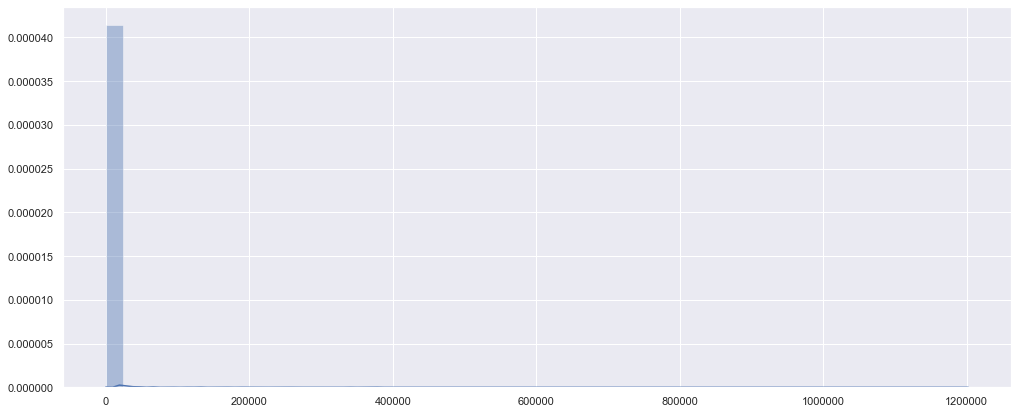

In [18]:
# set default plot size
sns.set(rc={'figure.figsize' : (17,7)})

# first check on the distribution shape looking for outliers
p = sns.distplot(total_assets_by_cand.VR_BEM_CANDIDATO.values / 1000) 

In [25]:
# divide vaules by 1000 to get data representation in thousands
asset_values = total_assets_by_cand['VR_BEM_CANDIDATO'].values / 1000

# obtain mean and std of the population and filter the dataset until 1 sd - it should cover ~ 68% of the dataset
mu = np.median(asset_values)
sd = np.std(asset_values)
fd = [e for e in asset_values if (mu - 1.0 * sd < e < mu + 1.0 * sd)]

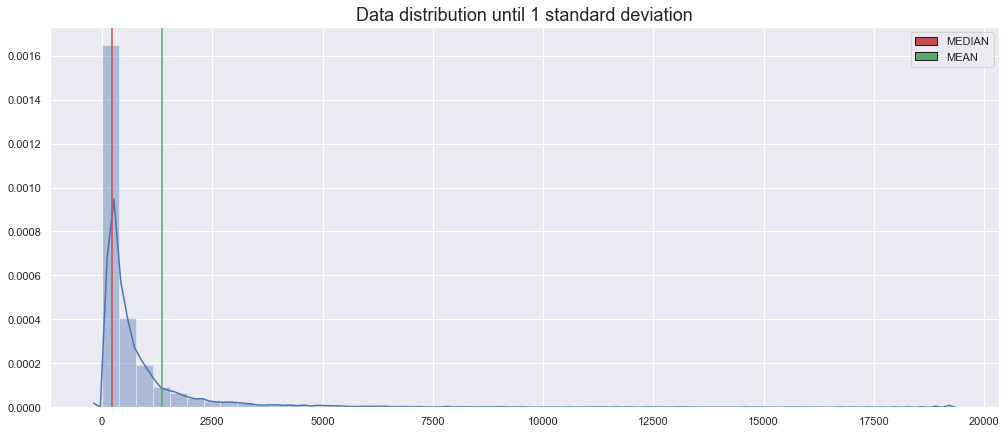

In [30]:
# plot figure
p = sns.distplot(fd) 

# add vertical lines to highlight mean and median
plt.axvline(np.median(asset_values), color='r')
plt.axvline(np.mean(asset_values), color='g')

# create legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ['r','g']]
labels= ["MEDIAN", "MEAN"]
plt.legend(handles, labels)
plt.title('Data distribution until 1 standard deviation', 
          fontdict={'fontsize': 18})
plt.show()

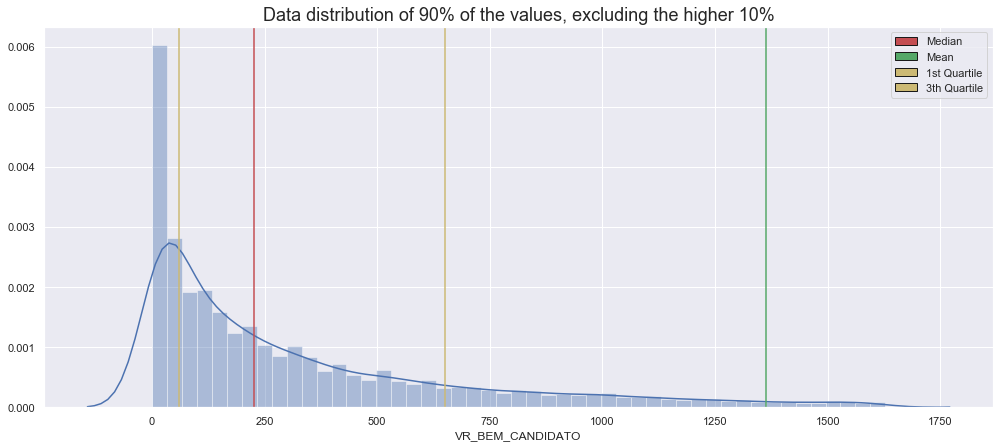

In [61]:
# plot figure
asset_values = total_assets_by_cand['VR_BEM_CANDIDATO'] / 1000
fd = asset_values[asset_values < asset_values.quantile(0.9)]
p = sns.distplot(fd) 

# add vertical lines to highlight mean and median
plt.axvline(np.median(asset_values), color='r')
plt.axvline(np.mean(asset_values), color='g')
plt.axvline(np.mean(asset_values.quantile(0.25)), color='y')
plt.axvline(np.mean(asset_values.quantile(0.75)), color='y')

# create legend
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ['r','g', 'y', 'y']]
labels= ["Median", "Mean", "1st Quartile", "3th Quartile"]
plt.legend(handles, labels)
plt.title('Data distribution of 90% of the values, excluding the higher 10%', 
          fontdict={'fontsize': 18})
plt.show()

#### There is a lot of concentration of net value until the 2nd Quartile / Median.
#### Removing the higher 10% of the dataset gave a clear and better view on how the 
#### data is distributed and how the outliers push the mean far from the median

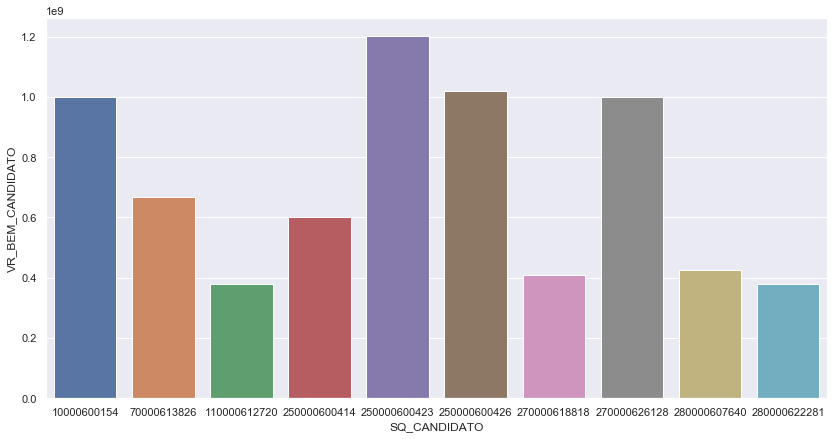

In [76]:
ax = sns.barplot(x="SQ_CANDIDATO", y="VR_BEM_CANDIDATO", data=total_assets_by_cand.head(10).sort_index().reset_index())

In [55]:
?sns.distplot

Signature:
sns.distplot(
    a,
    bins=None,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None,
)
Docstring:
Flexibly plot a univariate distribution of observations.

This function combines the matplotlib ``hist`` function (with automatic
calculation of a good default bin size) with the seaborn :func:`kdeplot`
and :func:`rugplot` functions. It can also fit ``scipy.stats``
distributions and plot the estimated PDF over the data.

Parameters
----------

a : Series, 1d-array, or list.
    Observed data. If this is a Series object with a ``name`` attribute,
    the name will be used to label the data axis.
bins : argument for matplotlib hist(), or None, optional
    Specification of hist bins, or None to use Freedman-Diaconis rule.
hist : bool, optional
    Whether to plot a (normed) histogram.
kde : bool, o